In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice
data_fol = r"..\data_files"

In [5]:
X_tfidf_path = os.path.join(data_fol, 'combined_model', "X_train_tfidf_nmf.pkl")
X_other_path = os.path.join(data_fol, 'combined_model', "__X_train.pkl")
y_path = os.path.join(data_fol, 'combined_model', "__y_train.pkl")

X_tfidf = pd.read_pickle(X_tfidf_path)
X_other = pd.read_pickle(X_other_path)
y = pd.read_pickle(y_path)

In [3]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
y.head()

,all_engagement,categories
tid,,
1361890179951296512,3.25,low
1358354354462289920,165.00,high
1363916379519336448,0.00,zero
1369296990782320648,31.00,med
1369559005811662851,0.00,zero


Combine two feature dataframes into one.

In [10]:
X = pd.concat([X_other.drop(columns = ['hashtags_clean', 'text_clean']), X_tfidf], axis=1)

In [11]:
X

,user_followers_count,user_verified,media_count,media_animated_gif,media_photo,media_video,0,1,2,3,...,70,71,72,73,74,75,76,77,78,79
tid,,,,,,,,,,,,,,,,,,,,,
1361890179951296512,360,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1358354354462289920,382,0,0,0,0,0,0.0,0.000000,0.117835,0.000000,...,0.000000,0.000000,0.000000,0.002420,0.0,0.000106,0.004448,0.000000,0.000000,0.000000
1363916379519336448,417,0,0,0,0,0,0.0,0.000000,0.200776,0.000000,...,0.000000,0.780888,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1369296990782320648,6656,0,0,0,0,0,0.0,0.000000,0.171878,0.000000,...,0.000308,0.000000,0.000000,0.000063,0.0,0.000000,0.003795,0.000000,0.005820,0.007507
1369559005811662851,104,0,0,0,0,0,0.0,0.022518,0.240877,0.003185,...,0.000000,0.009873,0.001148,0.000000,0.0,0.000000,0.015886,0.027670,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369950382693232643,6045,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1368967563837857792,15198,1,0,0,0,0,0.0,0.000000,0.000000,0.000000,...,0.825217,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1365011079600824322,416,0,0,0,0,0,0.0,0.000000,0.357371,0.000000,...,0.344695,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### Try some models

#### Support Vector Classification

In [ ]:
from sklearn.svm import SVC

In [18]:
param_distributions = dict(C=[.5, 1, 2, 3])

svc = SVC(kernel='rbf', class_weight='balanced')
clf = GridSearchCV(svc, param_distributions, cv=3)
search = clf.fit(X, y['categories'])
search.cv_results_

{'mean_fit_time': array([25.28930887, 25.50243362, 23.96036641, 25.35421069]),
 'std_fit_time': array([0.80197989, 0.97814514, 0.50269123, 1.43498245]),
 'mean_score_time': array([13.06903577, 12.07717951, 12.51327928, 12.91928943]),
 'std_score_time': array([0.307639  , 1.3419034 , 0.69869098, 0.27306695]),
 'param_C': masked_array(data=[0.5, 1, 2, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.5}, {'C': 1}, {'C': 2}, {'C': 3}],
 'split0_test_score': array([0.5098676 , 0.50911816, 0.50662003, 0.50637022]),
 'split1_test_score': array([0.50287285, 0.50012491, 0.50012491, 0.49887584]),
 'split2_test_score': array([0.49987509, 0.50137397, 0.50312266, 0.50437172]),
 'mean_test_score': array([0.50420518, 0.50353901, 0.5032892 , 0.50320593]),
 'std_test_score': array([0.00418679, 0.00397787, 0.00265424, 0.00316867]),
 'rank_test_score': array([1, 2, 3, 4])}

In [16]:
#also trying c=4 just in case
svc = SVC(C=4, kernel='rbf', class_weight='balanced')
svc.fit(X, y['categories'])
labels = svc.predict(X)

In [17]:
results = y['categories'].to_frame()
results['labels'] = labels
pd.crosstab(results.categories, results.labels)

labels,high,low,med,zero
categories,,,,
high,165,33,16,140
low,232,115,38,2582
med,566,180,96,1831
zero,168,91,46,5710


#### Multinomial NB

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
param_distributions = dict(alpha=[.5, 1, 2, 3])

mnb = MultinomialNB()
clf = GridSearchCV(mnb, param_distributions, cv=3)
search = clf.fit(X, y['categories'])
search.cv_results_

{'mean_fit_time': array([0.08907588, 0.09239189, 0.08867598, 0.08614953]),
 'std_fit_time': array([0.01525196, 0.01083352, 0.00308387, 0.00552782]),
 'mean_score_time': array([0.02228657, 0.02422261, 0.02141603, 0.02605025]),
 'std_score_time': array([0.00776792, 0.00591056, 0.00142086, 0.00454143]),
 'param_alpha': masked_array(data=[0.5, 1, 2, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5}, {'alpha': 1}, {'alpha': 2}, {'alpha': 3}],
 'split0_test_score': array([0.52735448, 0.52810392, 0.52810392, 0.5276043 ]),
 'split1_test_score': array([0.52285786, 0.52310767, 0.52260804, 0.52235823]),
 'split2_test_score': array([0.53260055, 0.53260055, 0.53235074, 0.53260055]),
 'mean_test_score': array([0.5276043 , 0.52793738, 0.52768757, 0.52752103]),
 'std_test_score': array([0.00398136, 0.00387724, 0.00398832, 0.00418182]),
 'rank_test_score': array([3, 1, 2, 4])}

#### random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
param_distributions = dict(max_depth = [5,10,15])

rf = RandomForestClassifier(n_estimators=30)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y['categories'])
search.cv_results_

{'mean_fit_time': array([0.50635576, 0.84192252, 0.97853192]),
 'std_fit_time': array([0.02876492, 0.01471415, 0.03966343]),
 'mean_score_time': array([0.04627339, 0.04650108, 0.06779035]),
 'std_score_time': array([0.0078793 , 0.00601886, 0.00396257]),
 'param_max_depth': masked_array(data=[5, 10, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5}, {'max_depth': 10}, {'max_depth': 15}],
 'split0_test_score': array([0.52660505, 0.53909568, 0.54758931]),
 'split1_test_score': array([0.52385711, 0.54434174, 0.54509118]),
 'split2_test_score': array([0.53384961, 0.54958781, 0.55458406]),
 'mean_test_score': array([0.52810392, 0.54434174, 0.54908818]),
 'std_test_score': array([0.00421486, 0.00428339, 0.00401777]),
 'rank_test_score': array([3, 2, 1])}

In [25]:
param_distributions = dict(max_depth = [20,30])

rf = RandomForestClassifier(n_estimators=30)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y['categories'])
search.cv_results_

{'mean_fit_time': array([1.20155056, 1.44906131]),
 'std_fit_time': array([0.03207503, 0.0899621 ]),
 'mean_score_time': array([0.07335289, 0.07280072]),
 'std_score_time': array([0.00825034, 0.00751723]),
 'param_max_depth': masked_array(data=[20, 30],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 20}, {'max_depth': 30}],
 'split0_test_score': array([0.54584062, 0.54359231]),
 'split1_test_score': array([0.54484137, 0.54109418]),
 'split2_test_score': array([0.54958781, 0.54634024]),
 'mean_test_score': array([0.5467566 , 0.54367558]),
 'std_test_score': array([0.00204311, 0.00214251]),
 'rank_test_score': array([1, 2])}

In [26]:
param_distributions = dict(n_estimators = [30,60,90])

rf = RandomForestClassifier(max_depth=15)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y['categories'])
search.cv_results_

{'mean_fit_time': array([0.95707393, 2.05869166, 2.9077549 ]),
 'std_fit_time': array([0.01272559, 0.05567971, 0.07606303]),
 'mean_score_time': array([0.06394053, 0.1054461 , 0.15117613]),
 'std_score_time': array([0.00973499, 0.00941602, 0.01270135]),
 'param_n_estimators': masked_array(data=[30, 60, 90],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 30}, {'n_estimators': 60}, {'n_estimators': 90}],
 'split0_test_score': array([0.54584062, 0.54584062, 0.5473395 ]),
 'split1_test_score': array([0.54634024, 0.54609043, 0.549338  ]),
 'split2_test_score': array([0.55233575, 0.553335  , 0.55083687]),
 'mean_test_score': array([0.5481722 , 0.54842202, 0.54917145]),
 'std_test_score': array([0.00295113, 0.0034755 , 0.00143265]),
 'rank_test_score': array([3, 2, 1])}

#### kmeans

In [27]:
from sklearn.cluster import KMeans

In [28]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

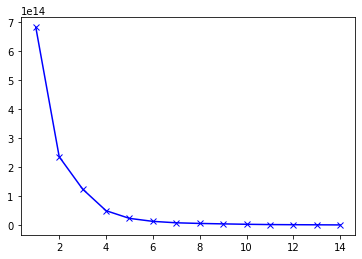

In [29]:
fig, ax = plt.subplots()
ax.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

In [37]:
results = y['categories'].to_frame()
results['clusters'] = clusters
pd.crosstab(results.categories, results.clusters)

clusters,0,1,2,3
categories,,,,
high,346,1,1,6
low,2967,0,0,0
med,2650,0,2,21
zero,6015,0,0,0


#### Gaussian Mixture

In [38]:
from sklearn.mixture import GaussianMixture

In [39]:
gmm = GaussianMixture(n_components=4, random_state=0)

In [40]:
gmm.fit(X)

GaussianMixture(n_components=4, random_state=0)

In [41]:
labels = gmm.predict(X)

In [42]:
results = y['categories'].to_frame()
results['labels'] = labels
pd.crosstab(results.categories, results.labels)

labels,0,1,2,3
categories,,,,
high,343,1,3,7
low,2943,0,4,20
med,2632,0,14,27
zero,5983,0,3,29


#### ridge regression

In [43]:
from sklearn.linear_model import Ridge

In [44]:
param_distributions = dict(alpha = [.5, 1, 1.5])

ridge = Ridge()
clf = GridSearchCV(ridge, param_distributions, cv=3)
search = clf.fit(X, y['all_engagement'])
search.cv_results_

{'mean_fit_time': array([0.04653811, 0.04909762, 0.04520925]),
 'std_fit_time': array([0.00675742, 0.00072017, 0.00813493]),
 'mean_score_time': array([0.01648418, 0.01722423, 0.01214155]),
 'std_score_time': array([0.00101516, 0.0011054 , 0.00647132]),
 'param_alpha': masked_array(data=[0.5, 1, 1.5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5}, {'alpha': 1}, {'alpha': 1.5}],
 'split0_test_score': array([0.02434031, 0.02441884, 0.0244953 ]),
 'split1_test_score': array([0.02322897, 0.0234556 , 0.02367701]),
 'split2_test_score': array([0.04226362, 0.04234269, 0.04241513]),
 'mean_test_score': array([0.0299443 , 0.03007238, 0.03019581]),
 'std_test_score': array([0.00872288, 0.00868533, 0.00864681]),
 'rank_test_score': array([3, 2, 1])}

None of the models seem to be able to go much above 50% performance, suggesting that maybe there is not an underlying pattern to the data. There does not seem to be any point to running any of these models on the test data if they cannot even accurately predict the data they're being trained on.